In [1]:
import numpy as np
import pandas as pd

In [2]:
#euclidean distance
def euclidean(val1,val2):
    ed=np.sqrt(np.sum((val1-val2)**2))
    return ed

In [3]:
def consine(val1,val2):
    cs=np.dot(val1,val2)/(np.sqrt(np.dot(val1,val1))*np.sqrt(np.dot(val2,val2)))
    return cs

In [4]:
val1=np.array([1,1])
val2=np.array([3,2])

In [5]:
euclidean(val1,val2)

2.23606797749979

In [6]:
consine(val1,val2)

0.98058067569092

In [7]:
val3=val2*2

In [8]:
def l1_norm(v):
    norm=np.sum(np.abs(v))
    return v/norm
def l2_norm(v):
    norm=np.sqrt(np.sum(np.square(v)))
    return v/norm

In [9]:
x11=l2_norm(val1)
x21=l2_norm(val2)
x31=l2_norm(val3)

In [10]:
euclidean(x31,np.array([0,0]))

1.0

In [11]:
!pip install wikipedia


In [12]:
import wikipedia

In [13]:
ML=wikipedia.page("machinelearning")
AI=wikipedia.page("Artificial Intelligence")
Soccer=wikipedia.page("Soccer")
Tennis=wikipedia.page("Tenis")

In [14]:
ML.content[:205]

'Machine learning (ML) is the study of computer algorithms that improve automatically through experience. It is seen as a subset of artificial intelligence. Machine learning algorithms build a model based o'

In [15]:
print("ML \t",len(ML.content.split()),"\n"
       "AI \t",len(AI.content.split()),"\n"
     "soccer \t",len(Soccer.content.split()),"\n"
     "tennis \t",len(Tennis.content.split()),"\n")

ML 	 6794 
AI 	 10332 
soccer 	 6706 
tennis 	 11180 



In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=np.array(cv.fit_transform([ML.content,AI.content,Soccer.content]))

### K mean 

In [17]:
import pandas as pd
import wikipedia
articles=['Harbhajan Singh','Yuvraj Singh','Gautam Gambhir','Kapil Dev','Sachin Tendulkar','LionelMessi','Cristiano Ronaldo','Diego Maradona',
          'Robert Lewandowski','Kevin De Bruyne','John Tukey']
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    #print(article,":",len(article.content.split())),
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst

loading content:  Harbhajan Singh
loading content:  Yuvraj Singh
loading content:  Gautam Gambhir
loading content:  Kapil Dev
loading content:  Sachin Tendulkar
loading content:  LionelMessi
loading content:  Cristiano Ronaldo
loading content:  Diego Maradona
loading content:  Robert Lewandowski
loading content:  Kevin De Bruyne
loading content:  John Tukey
examine content


['Harbhajan Singh Plaha (pronunciation ; born 3 July 1980 in Jalandhar, Punjab, India), commonly known as Harbhajan or simply Bhajji or Bhajju Pa, is a former Indian international cricketer, who plays all forms of the game cricket. A specialist spin bowler, he has the second-highest number of Test wickets by an off spinner, behind Sri Lanka\'s Muttiah Muralitharan.\nHe was the  captain of IPL team Mumbai Indians and Punjab for the 2012–13 Ranji Trophy season.\nUnder his captaincy, Mumbai Indians won 2011 Champions League Twenty20\nSingh made his Test and One Day International (ODI) debuts in early 1998. His career was initially affected by investigations into the legality of his bowling action, as well as several disciplinary incidents. However, in 2001, with leading leg spinner Anil Kumble injured, Harbhajan\'s career was resuscitated after Indian captain Sourav Ganguly called for his inclusion in the Border-Gavaskar Trophy team. In that series victory over Australia, Harbhajan establ

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

In [19]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '000th', '001', '01', '02', '03', '03303', '03304', '03305', '0384', '04', '04854', '05', '05101', '05102', '05103', '05104', '05121', '0520', '06', '07', '07616', '08', '08036', '08113', '089', '09', '09568', '09776', '09777', '10', '100', '1000', '1000th', '100m', '100th', '101', '101st', '102', '103', '103rd', '104', '105', '106', '106th', '107', '1070', '108', '109', '10998116', '109th', '10th', '11', '110', '111', '112', '113', '113th', '114', '115', '11550398', '116', '117', '118', '119', '119th', '11th', '12', '120', '120th', '121', '122', '122nd', '123', '124', '125', '125th', '126', '126m', '127', '128', '128th', '129', '12th', '13', '130', '131', '133', '134', '135', '136', '137', '137th', '138', '139', '13bayern', '13th', '14', '140', '141', '142', '143', '144', '144th', '145', '146', '148', '149', '14th', '15', '150', '150th', '151', '152', '153', '154', '154674707', '154m', '155', '156', '157', '158', '159', '159731367', '16', '160', '161', '162', '163', '165

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

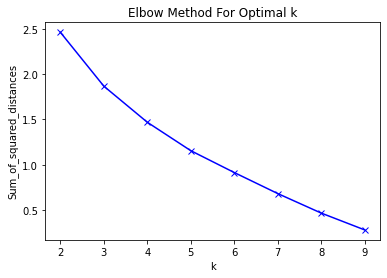

In [21]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                 title  cluster
0      Harbhajan Singh        0
1         Yuvraj Singh        0
2       Gautam Gambhir        0
3            Kapil Dev        0
4     Sachin Tendulkar        0
5          LionelMessi        1
6    Cristiano Ronaldo        1
7       Diego Maradona        1
8   Robert Lewandowski        1
9      Kevin De Bruyne        1
10          John Tukey        2


In [32]:
print(labels)

[0 0 0 0 0 1 1 1 1 1 2]


In [23]:
!pip install wordcloud

Cluster: 0
Titles
  Harbhajan Singh
     Yuvraj Singh
   Gautam Gambhir
        Kapil Dev
 Sachin Tendulkar


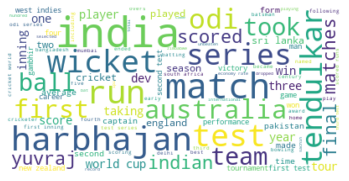

Cluster: 1
Titles
        LionelMessi
  Cristiano Ronaldo
     Diego Maradona
 Robert Lewandowski
    Kevin De Bruyne


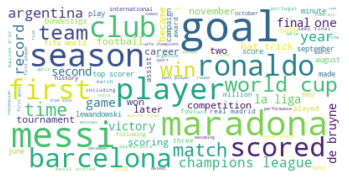

Cluster: 2
Titles
 John Tukey


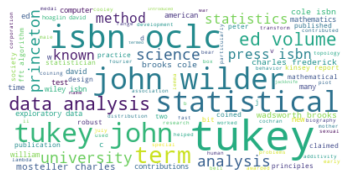

In [24]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Agglomerative Clustering

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
X = CountVectorizer().fit_transform(wiki_lst)
X = TfidfTransformer().fit_transform(X)
X = X.todense()

In [26]:
from sklearn.cluster import AgglomerativeClustering
model1 = AgglomerativeClustering(n_clusters=4,affinity='cosine',linkage='complete')
model1.fit(X)
 

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=4)

In [27]:
labels1=model1.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels1)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                 title  cluster
0      Harbhajan Singh        0
1         Yuvraj Singh        0
2       Gautam Gambhir        0
3            Kapil Dev        0
4     Sachin Tendulkar        0
5          LionelMessi        0
6    Cristiano Ronaldo        0
7       Diego Maradona        0
10          John Tukey        1
9      Kevin De Bruyne        2
8   Robert Lewandowski        3


In [28]:
print(labels1)

[0 0 0 0 0 0 0 0 3 2 1]


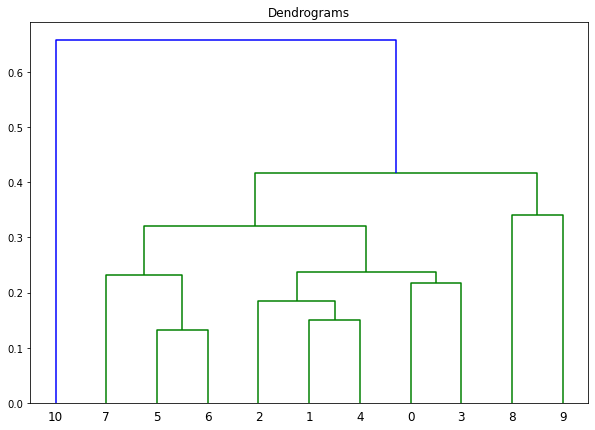

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(X,method='complete',metric='cosine'))

In [30]:
import plotly.figure_factory as ff
Z = shc.linkage(X,"complete", metric="cosine")

fig = ff.create_dendrogram(Z, orientation='left', labels=title)
fig.update_layout(width=800, height=800)
fig.show()

Cluster: 0
Titles
   Harbhajan Singh
      Yuvraj Singh
    Gautam Gambhir
         Kapil Dev
  Sachin Tendulkar
       LionelMessi
 Cristiano Ronaldo
    Diego Maradona


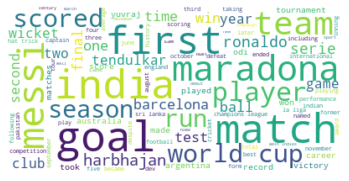

Cluster: 1
Titles
 John Tukey


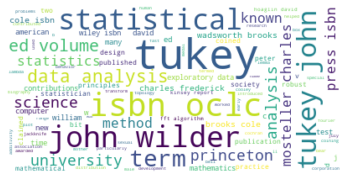

Cluster: 2
Titles
 Kevin De Bruyne


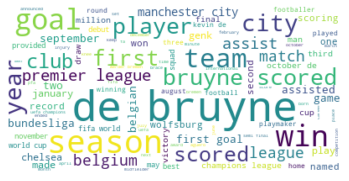

Cluster: 3
Titles
 Robert Lewandowski


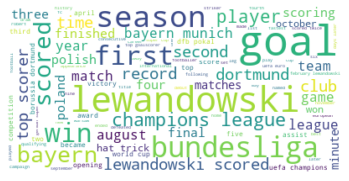

In [31]:
from wordcloud import WordCloud
result={'cluster':labels1,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,4):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## Removing Stop words

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = TfidfVectorizer(stop_words={'english'})
X1 = vectorizer.fit_transform(wiki_lst)
X1 = TfidfTransformer().fit_transform(X1)
X1 = X1.todense()

In [43]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=3,affinity='cosine',linkage='complete')
model2.fit(X1)

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=3)

In [44]:
labels2=model2.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels2)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                 title  cluster
5          LionelMessi        0
6    Cristiano Ronaldo        0
7       Diego Maradona        0
8   Robert Lewandowski        0
9      Kevin De Bruyne        0
10          John Tukey        1
0      Harbhajan Singh        2
1         Yuvraj Singh        2
2       Gautam Gambhir        2
3            Kapil Dev        2
4     Sachin Tendulkar        2


In [45]:
from sklearn.cluster import AgglomerativeClustering
model3 = AgglomerativeClustering(n_clusters=4,affinity='cosine',linkage='complete')
model3.fit(X1)

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=4)

In [46]:
labels3=model3.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels3)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                 title  cluster
5          LionelMessi        0
6    Cristiano Ronaldo        0
7       Diego Maradona        0
8   Robert Lewandowski        0
10          John Tukey        1
0      Harbhajan Singh        2
1         Yuvraj Singh        2
2       Gautam Gambhir        2
3            Kapil Dev        2
4     Sachin Tendulkar        2
9      Kevin De Bruyne        3


In [37]:
print(labels2)

[2 2 2 2 2 0 0 0 0 3 1]


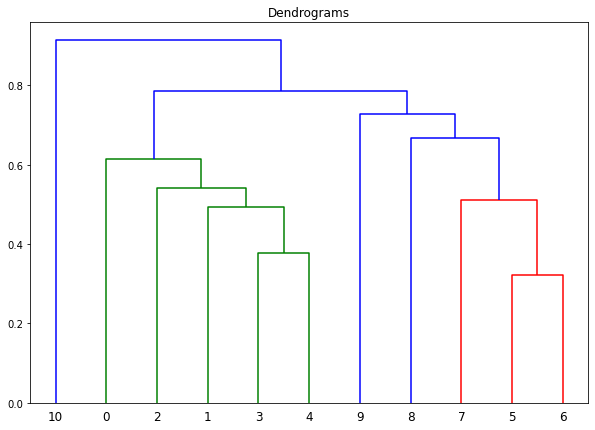

In [38]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(X1,method='complete',metric='cosine'))

In [39]:
import plotly.figure_factory as ff
Z1 = shc.linkage(X1,"complete", metric="cosine")

fig = ff.create_dendrogram(Z1, orientation='left', labels=title)
fig.update_layout(width=800, height=800)
fig.show()

Cluster: 0
Titles
        LionelMessi
  Cristiano Ronaldo
     Diego Maradona
 Robert Lewandowski


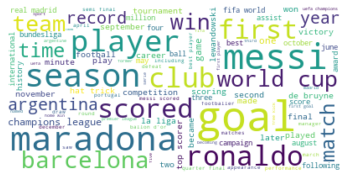

Cluster: 1
Titles
 John Tukey


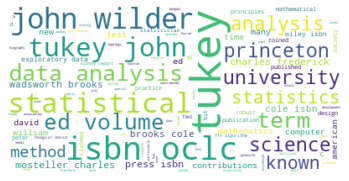

Cluster: 2
Titles
  Harbhajan Singh
     Yuvraj Singh
   Gautam Gambhir
        Kapil Dev
 Sachin Tendulkar


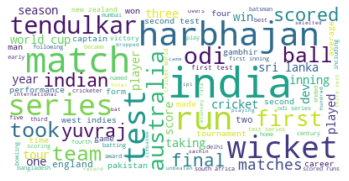

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [52]:
from wordcloud import WordCloud
result={'cluster':labels2,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,4):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Cluster: 0
Titles
        LionelMessi
  Cristiano Ronaldo
     Diego Maradona
 Robert Lewandowski


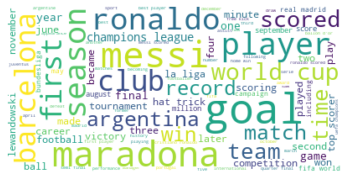

Cluster: 1
Titles
 John Tukey


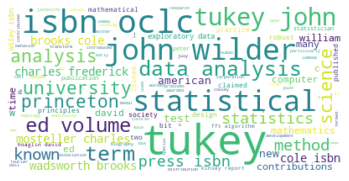

Cluster: 2
Titles
  Harbhajan Singh
     Yuvraj Singh
   Gautam Gambhir
        Kapil Dev
 Sachin Tendulkar


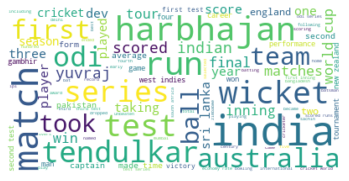

Cluster: 3
Titles
 Kevin De Bruyne


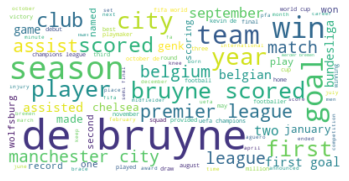

In [51]:
from wordcloud import WordCloud
result={'cluster':labels3,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,4):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()